<a href="https://colab.research.google.com/github/PrekshaDwivedi07/Uber_Supply_Demand_Gap/blob/main/Uber_Supply_Demand_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Exploratory Data Analysis Of Uber Supply Demand Gap

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**
Project Overview:
This project focuses on conducting Exploratory Data Analysis (EDA) on Uber ride request data, with the primary objective of identifying and understanding the gap between rider demand and driver supply. The analysis offers valuable insights into peak request times, trip statuses, and the underlying factors contributing to unfulfilled ride requests across different locations and time intervals.

Key Activities:

• Data Preparation and Cleaning:
The dataset included ride request records containing timestamps, pickup points, driver IDs, and trip statuses. Data preprocessing involved converting timestamps to datetime format, handling missing values, and engineering new features such as time slots and hourly bins to enhance analysis.

• Visualization Techniques:
Various visualization methods were used—such as bar graphs, line charts, pivot tables, and heatmaps—to explore trends in ride request patterns, cancellation rates, and availability of cars at different times and locations.

• Findings and Patterns:
The EDA revealed several critical insights:

• A significant supply-demand mismatch exists during peak hours, particularly in the early morning (5 AM – 9 AM) and evening (5 PM – 9 PM) slots.

• In the morning peak, high demand at the airport often results in the "No Cars Available" status, indicating insufficient driver availability.

• During the evening peak, many requests from the city to the airport are cancelled by drivers, possibly due to trip length or end-of-shift timing.

• The city consistently sees higher trip cancellations, while the airport faces more instances of car unavailability.

• The imbalance is not uniform and varies by both time of day and pickup location.

This EDA provides actionable insights into Uber’s operational challenges related to supply-demand mismatches. It enables data-driven decision-making for strategies such as driver incentive programs, dynamic pricing, and resource redistribution. Future exploration could involve building predictive models to anticipate peak demand periods or optimize driver allocation in real-time.

##GitHub Link:-
https://github.com/PrekshaDwivedi07/Uber_Supply_Demand_Gap.git

# **Problem Statement**-

The objective of this dataset is to examine and analyze Uber ride request data to uncover critical insights about the mismatch between rider demand and driver supply, aiming to improve service availability and operational efficiency. Key areas of focus include:

• Demand-Supply Imbalance:
A core aim is to identify when and where ride requests exceed driver availability. Understanding the conditions under which trips are cancelled or result in "No Cars Available" statuses is essential for addressing service bottlenecks and improving rider satisfaction.

• Peak Hour Analysis:
Demand fluctuates across the day, especially during morning and evening rush hours. This analysis seeks to uncover patterns in peak-hour ride requests and the corresponding supply response, helping Uber to better allocate driver resources during critical time periods.

• Location-Based Gaps:
Trip fulfillment also varies by pickup point, with the city and airport exhibiting different supply-demand characteristics. Analyzing the geographic distribution of gaps helps target location-specific operational strategies, such as rebalancing cars or offering targeted incentives to drivers.

By addressing these problem areas through data exploration and visualization, the analysis supports Uber’s efforts to reduce unfulfilled requests, enhance driver-rider matching, and optimize overall service delivery.

#### **Business Objective**-

The primary business objective of this project is to utilize data-driven insights to support strategic decision-making for improving Uber’s ride availability, driver allocation, and customer satisfaction. By analyzing patterns in ride requests and supply shortfalls, the project aims to:

Reduce the Supply-Demand Gap:
Identify time slots and locations with high unfulfilled demand (due to cancellations or no cars available) to inform better driver deployment strategies and reduce the frequency of missed ride opportunities.

Optimize Driver Allocation and Scheduling:
Uncover peak demand periods and locations to enable more effective scheduling and positioning of drivers, ensuring optimal resource utilization and increased fulfillment rates.

Enhance Rider Experience and Retention:
Minimize trip cancellations and wait times through better supply matching, ultimately leading to improved customer satisfaction and loyalty.

Support Pricing and Incentive Policies:
Use insights from demand surges and supply shortages to design dynamic pricing models and targeted incentive programs that encourage driver availability during high-demand hours.

Improve Operational Efficiency:
Enable data-backed operational planning by identifying inefficient zones or time periods, allowing Uber to take preemptive actions to address recurring service issues.

By addressing these objectives, Uber can strengthen its market presence, improve service reliability, and enhance the overall user and driver experience on the platform.

## ***Data Wrangling*** -

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/Uber Request K02.csv')

In [ ]:
data.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Request Date', 'Request Day',
       'Trip Duration (mins)', 'Is Driver Assigned', 'Was Completed',
       'Pickup_Airport', 'Request Period'],
      dtype='object')

In [ ]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Day,Trip Duration (mins),Is Driver Assigned,Was Completed,Pickup_Airport,Request Period
0,619,Airport,1,Trip Completed,07-11-2016 11:51,07-11-2016 13:00,07-11-2016,Monday,69,Yes,Yes,1,Morning
1,867,Airport,1,Trip Completed,07-11-2016 17:57,07-11-2016 18:47,07-11-2016,Monday,50,Yes,Yes,1,Evening
2,1807,City,1,Trip Completed,07-12-2016 09:17,07-12-2016 09:58,07-12-2016,Wednesday,41,Yes,Yes,0,Morning
3,2532,Airport,1,Trip Completed,07-12-2016 21:08,07-12-2016 22:03,07-12-2016,Wednesday,55,Yes,Yes,1,Night
4,3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,Wednesday,52.51666667,Yes,Yes,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NA,No Cars Available,15-07-2016 23:49,NA,15-07-2016,Friday,NA,No,No,0,Night
6741,6752,Airport,NA,No Cars Available,15-07-2016 23:50,NA,15-07-2016,Friday,NA,No,No,1,Night
6742,6751,City,NA,No Cars Available,15-07-2016 23:52,NA,15-07-2016,Friday,NA,No,No,0,Night
6743,6754,City,NA,No Cars Available,15-07-2016 23:54,NA,15-07-2016,Friday,NA,No,No,0,Night


In [ ]:
data.shape

(6745, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Request id            6745 non-null   int64 
 1   Pickup point          6745 non-null   object
 2   Driver id             6745 non-null   object
 3   Status                6745 non-null   object
 4   Request timestamp     6745 non-null   object
 5   Drop timestamp        6745 non-null   object
 6   Request Date          6745 non-null   object
 7   Request Day           6745 non-null   object
 8   Trip Duration (mins)  6745 non-null   object
 9   Is Driver Assigned    6745 non-null   object
 10  Was Completed         6745 non-null   object
 11  Pickup_Airport        6745 non-null   int64 
 12  Request Period        6745 non-null   object
dtypes: int64(2), object(11)
memory usage: 685.2+ KB


### Dataset Description

This dataset comprises *6,745 ride request entries* collected from a ride-hailing platform (such as Uber), focusing on pickup details, driver assignments, trip completion, and timestamps. It is primarily designed for analyzing the *supply-demand dynamics* in urban transportation, identifying peak demand hours, cancellation patterns, and driver availability.

The dataset includes key information about when and where requests were made, whether they were fulfilled, the time taken for each trip, and other engineered fields to facilitate time-based analysis.

###Column Descriptions

| Column Name              | Description                                                                                                                                             |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| *Request id*           | A unique numeric identifier for each ride request.                                                                                                      |
| *Pickup point*         | Indicates the pickup location, typically "City" or "Airport". This is useful in identifying geographic trends in demand and supply.                     |
| *Driver id*            | An identifier for the driver assigned to a request. If a driver wasn’t assigned, this field remains empty.                                              |
| *Status*               | Represents the final status of the ride — options include *"Trip Completed", **"Cancelled", or **"No Cars Available"*.                            |
| *Request timestamp*    | The exact date and time when the user made the ride request.                                                                                            |
| *Drop timestamp*       | The time when the ride was completed. This field may be empty if the trip wasn’t completed.                                                             |
| *Request Date*         | Extracted from the request timestamp, this field shows the calendar date of the request (e.g., 2016-07-11).                                             |
| *Request Day*          | The day of the week on which the request was made (e.g., Monday, Tuesday). Useful for analyzing weekly demand patterns.                                 |
| *Trip Duration (mins)* | Duration of the trip in minutes. This is calculated based on the request and drop timestamps. It may be blank or zero for unfulfilled requests.         |
| *Is Driver Assigned*   | A derived boolean-like field that indicates whether a driver was assigned (Yes) or not (No) to a request.                                           |
| *Was Completed*        | Another derived field that shows whether the ride was successfully completed or not.                                                                    |
| *Pickup\_Airport*      | A binary indicator where 1 denotes an airport pickup and 0 represents a city pickup. Created for simplified location-based filtering.               |
| *Request Period*       | Categorizes the request time into broader slots like *Early Morning, **Morning, **Afternoon, **Evening*, etc., helping analyze temporal trends. |

###Finding duplicates and removing duplicates

In [ ]:
data.duplicated().value_counts()

,count
False,6745


#### Missing Values/Null Values

In [ ]:
data.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,0
Status,0
Request timestamp,0
Drop timestamp,0
Request Date,0
Request Day,0
Trip Duration (mins),0
Is Driver Assigned,0


###We don't have any duplicte and missing/null values in the dataset

In [ ]:
data.dtypes

,0
Request id,int64
Pickup point,object
Driver id,object
Status,object
Request timestamp,object
Drop timestamp,object
Request Date,object
Request Day,object
Trip Duration (mins),object
Is Driver Assigned,object


In [ ]:
data.describe()

,Request id,Pickup_Airport
count,6745.000000,6745.000000
mean,3384.644922,0.480059
std,1955.099667,0.499639
min,1.000000,0.000000
25%,1691.000000,0.000000
50%,3387.000000,0.000000
75%,5080.000000,1.000000
max,6766.000000,1.000000


As we can see dataset is clean and ready for further analysis, The manipulations performed on given data are as follows,

Data Loading

Handling Missing Values:

• We dont have any null values soo we dont need to do anything

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

##Univariate Analysis

In [ ]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Day,Trip Duration (mins),Is Driver Assigned,Was Completed,Pickup_Airport,Request Period
0,619,Airport,1,Trip Completed,07-11-2016 11:51,07-11-2016 13:00,07-11-2016,Monday,69,Yes,Yes,1,Morning
1,867,Airport,1,Trip Completed,07-11-2016 17:57,07-11-2016 18:47,07-11-2016,Monday,50,Yes,Yes,1,Evening
2,1807,City,1,Trip Completed,07-12-2016 09:17,07-12-2016 09:58,07-12-2016,Wednesday,41,Yes,Yes,0,Morning
3,2532,Airport,1,Trip Completed,07-12-2016 21:08,07-12-2016 22:03,07-12-2016,Wednesday,55,Yes,Yes,1,Night
4,3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,Wednesday,52.51666667,Yes,Yes,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NA,No Cars Available,15-07-2016 23:49,NA,15-07-2016,Friday,NA,No,No,0,Night
6741,6752,Airport,NA,No Cars Available,15-07-2016 23:50,NA,15-07-2016,Friday,NA,No,No,1,Night
6742,6751,City,NA,No Cars Available,15-07-2016 23:52,NA,15-07-2016,Friday,NA,No,No,0,Night
6743,6754,City,NA,No Cars Available,15-07-2016 23:54,NA,15-07-2016,Friday,NA,No,No,0,Night


##HISTOGRAM

Histogram represesnts the distribution of numerical value.They provide a visual way to see the shape of data's distribution

###Histogtram of Was Completed

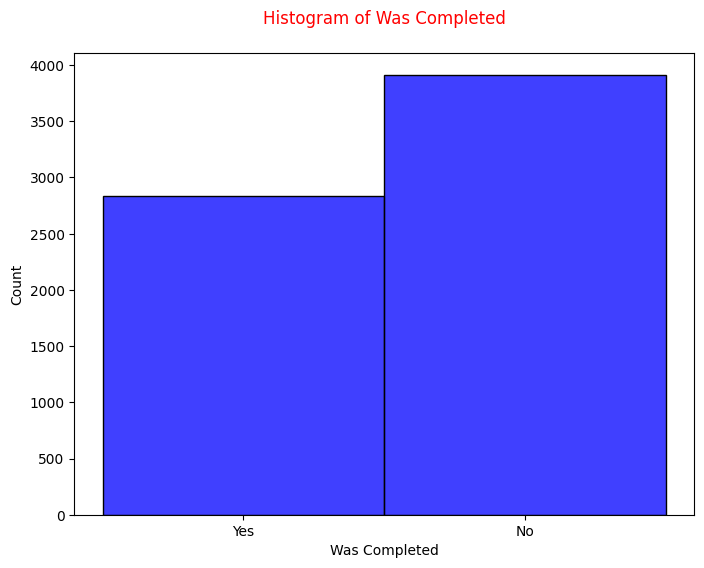

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Was Completed', color='blue', bins=20)
plt.title('Histogram of Was Completed\n', color='red')
plt.show()

###Insights

More rides were not completed than completed, indicating a significant supply-demand mismatch.

High uncompleted ride count suggests issues like driver unavailability or frequent cancellations.

This gap highlights a need for better driver allocation and incentive strategies to improve ride fulfillment.

###Histogram of Is Driver Assigned

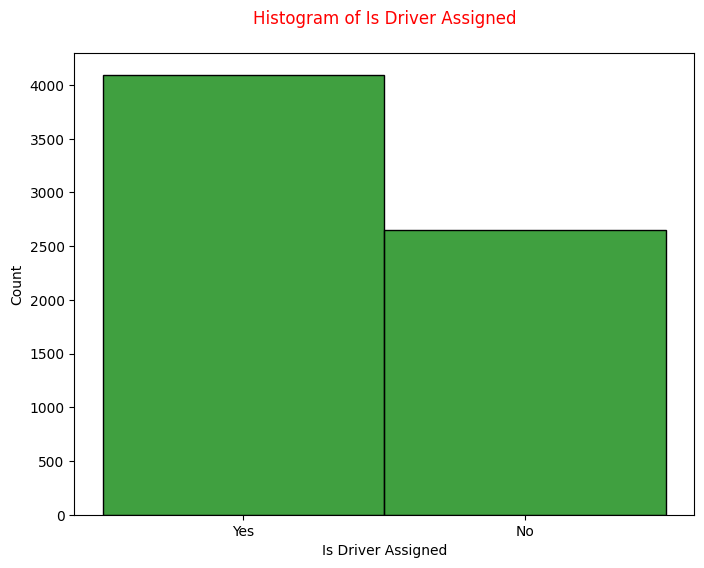

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Is Driver Assigned', color='green', bins=25)
plt.title('Histogram of Is Driver Assigned\n',color='red')
plt.show()

###Insights

Majority of ride requests had a driver assigned, indicating that the system is generally able to allocate drivers.

However, a significant portion (~40%) of requests had no driver assigned, revealing a notable supply shortfall.

This highlights a critical opportunity to improve driver availability during peak times or high-demand zones to reduce unassigned rides.

###Histogram of Request Period

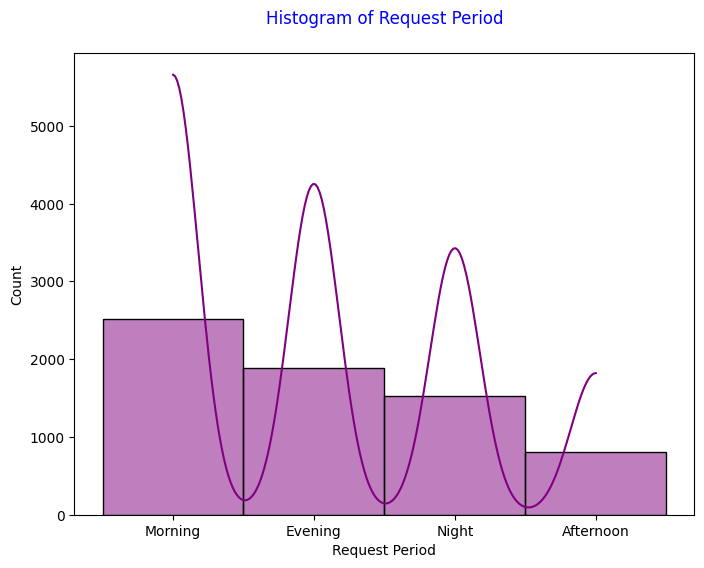

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Request Period', color='purple', bins=25, kde=True)
plt.title('Histogram of Request Period\n',color='blue')
plt.show()

###Insights

Morning has the highest number of ride requests, indicating a peak in user demand during commute hours.

Evening and Night also show considerable request volumes, suggesting a second peak likely linked to return trips or late-night travel.

Afternoon sees the lowest number of requests, making it a potential off-peak period with less rider activity.

###Histogram of Request Date

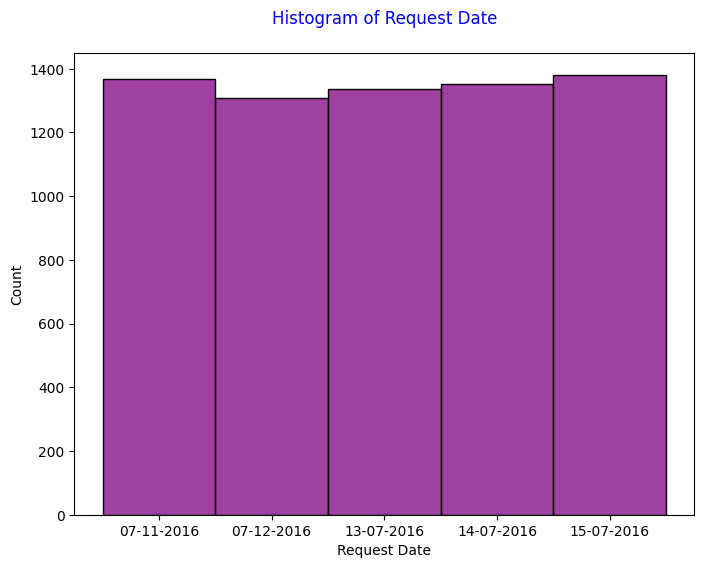

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x='Request Date', color='purple', bins=25)
plt.title('Histogram of Request Date\n',color='blue')
plt.show()

###Insights

Sure! Here are three concise insights from the histogram:

1. **Steady Requests:** The number of requests is consistent across all five days, with only slight variations.
2. **Highest on 15th July:** 15th July 2016 has the highest request count among the days shown.
3. **Low Fluctuation:** There is minimal fluctuation in request volume, indicating stable system usage.


###BAR PLOT / COUNT PLOT

A bar plot is a type of chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

###Bar plot of Status

In [ ]:
a=data.Status.value_counts()
a

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


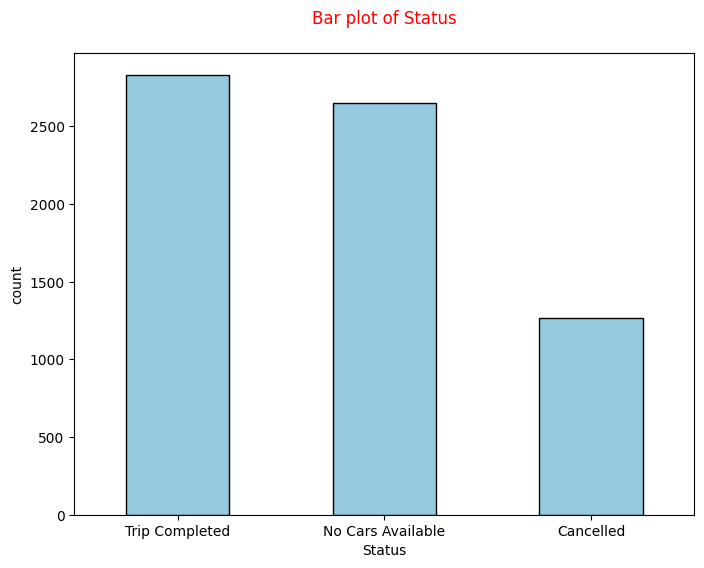

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = a.index, y = a.values, color='skyblue', width=0.5, edgecolor='black')
plt.title('Bar plot of Status\n',color='red')
plt.ylabel('count')
plt.show()

###Insights



1. Most trips were completed, showing efficient service delivery.
2. "No Cars Available" is a major issue, almost as frequent as completed trips.
3. Cancellations are significantly lower, indicating fewer user-initiated disruptions.

Bar plot of Pickup point

In [ ]:
b = data['Pickup point'].value_counts()
b

,count
Pickup point,
City,3507
Airport,3238


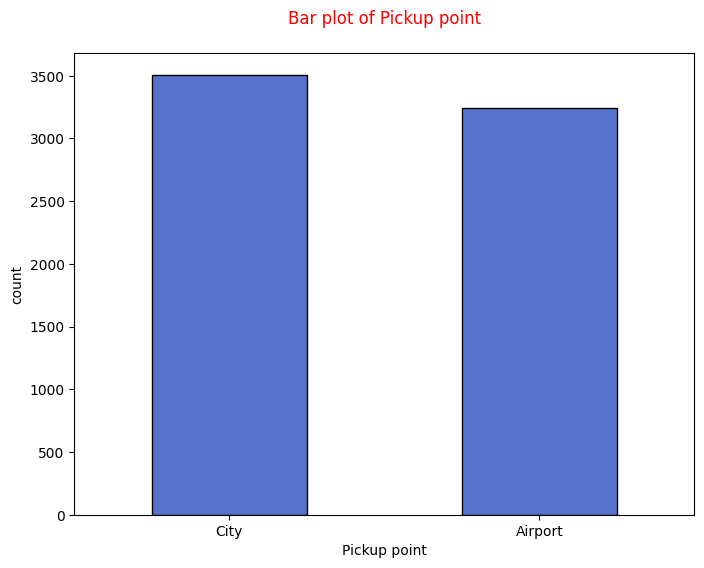

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x = b.index, y = b.values, color='royalblue', width=0.5, edgecolor='black')
plt.title('Bar plot of Pickup point\n',color='red')
plt.ylabel('count')
plt.show()

###Insights


1. City pickups are slightly higher than airport pickups.
2. Both locations show high demand, indicating well-distributed service needs.
3. More resources may be required in the city to meet the slightly greater demand.

###Bar Request Day

In [ ]:
c = data['Request Day'].value_counts()
c

,count
Request Day,
Wednesday,2644
Friday,1381
Monday,1367
Thursday,1353


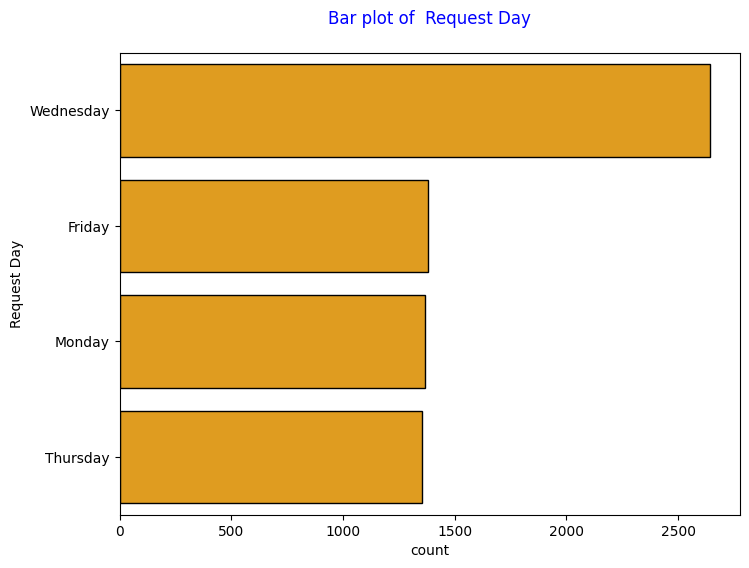

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(y = c.index, x = c.values, color='orange', orient='h', edgecolor='black')
plt.title('Bar plot of  Request Day\n',color='blue')
plt.xlabel('count')
plt.show()

###Insights

1.Wednesday has the highest number of requests, showing a mid-week peak in demand.

2.Monday, Thursday, and Friday have similar, lower request counts compared to Wednesday.

3.Services may need to be scaled up on Wednesdays to handle the higher load.

##Bivariate Analysis

In [ ]:
data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Day,Trip Duration (mins),Is Driver Assigned,Was Completed,Pickup_Airport,Request Period
0,619,Airport,1,Trip Completed,07-11-2016 11:51,07-11-2016 13:00,07-11-2016,Monday,69,Yes,Yes,1,Morning
1,867,Airport,1,Trip Completed,07-11-2016 17:57,07-11-2016 18:47,07-11-2016,Monday,50,Yes,Yes,1,Evening
2,1807,City,1,Trip Completed,07-12-2016 09:17,07-12-2016 09:58,07-12-2016,Wednesday,41,Yes,Yes,0,Morning
3,2532,Airport,1,Trip Completed,07-12-2016 21:08,07-12-2016 22:03,07-12-2016,Wednesday,55,Yes,Yes,1,Night
4,3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,13-07-2016,Wednesday,52.51666667,Yes,Yes,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NA,No Cars Available,15-07-2016 23:49,NA,15-07-2016,Friday,NA,No,No,0,Night
6741,6752,Airport,NA,No Cars Available,15-07-2016 23:50,NA,15-07-2016,Friday,NA,No,No,1,Night
6742,6751,City,NA,No Cars Available,15-07-2016 23:52,NA,15-07-2016,Friday,NA,No,No,0,Night
6743,6754,City,NA,No Cars Available,15-07-2016 23:54,NA,15-07-2016,Friday,NA,No,No,0,Night


###SCATTER PLOT

A scatter plot is a type of data visualization that uses dots to represent the values of two numerical variables. Scatter plots are used to observe relationships between variables.

###Scatter plot of Status and Is Driver Assigned




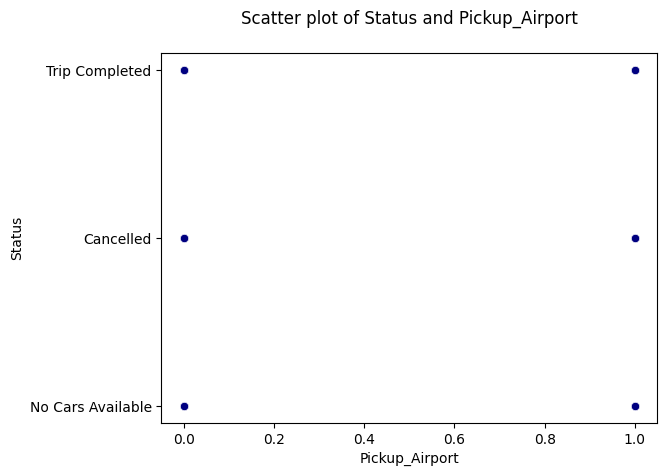

In [ ]:
sns.scatterplot(data = data, y ='Status', x ='Pickup_Airport', color='navy')
plt.title('Scatter plot of Status and Pickup_Airport\n',color='black')
plt.show()

###Insights

"No Cars Available" seems prominent at the airport (1), indicating a stronger supply shortage in that zone.

"Cancelled" and "Trip Completed" are more evenly distributed across both locations, suggesting cancellation might be driven by factors other than just pickup point (e.g., time of day or driver behavior).

###LINE PLOT

Line Plot Connects data points with a line to show trends over time across continuous variable.

###Line plot of Is Driver Assigned v/s Status

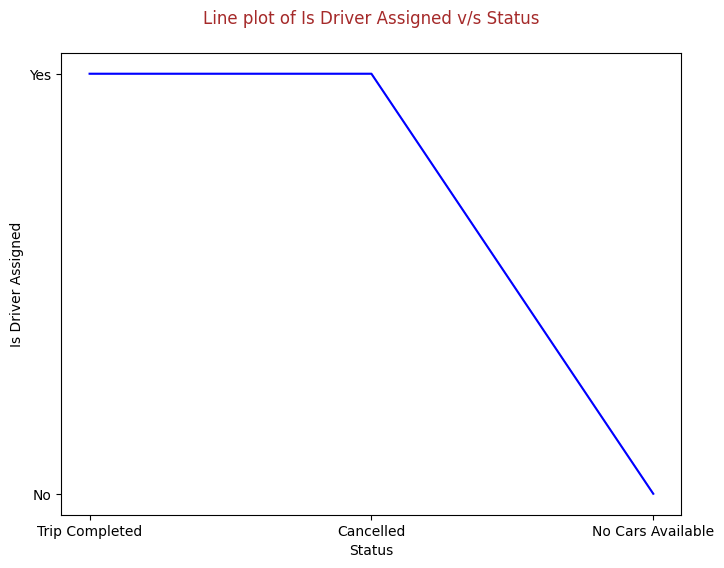

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data = data, y ='Is Driver Assigned', x ='Status', color='blue')
plt.title('Line plot of Is Driver Assigned v/s Status\n',color='brown')
plt.show()

###Insights

1. Drivers were assigned in all cases where the trip was either completed or cancelled.
2. No driver was assigned when the status showed "No Cars Available".
3. This indicates that driver availability directly impacts service completion or cancellation.


###PIE CHART

Pie chart is used to visualize the proportions of different categories within a whole dataset. I's circular statistical graph, where each slice of the pie represents a category, and the size of the slice is proportional to the category's contribution to the overall data.

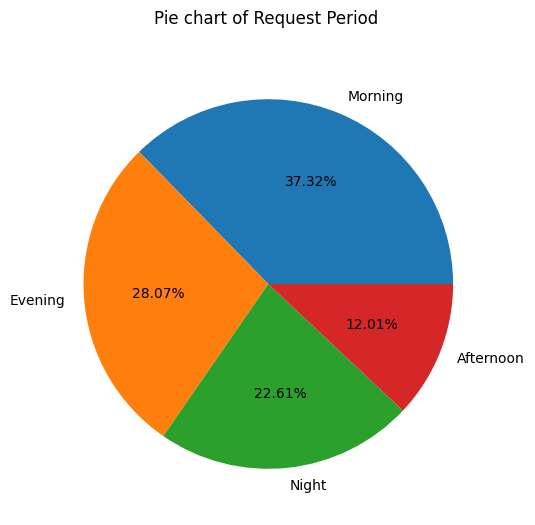

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(data['Request Period'].value_counts(), labels=data['Request Period'].value_counts().index, autopct='%.2f%%')
plt.title('Pie chart of Request Period \n', color = 'black')
plt.show()

###Insights

1. Morning is the most active request period, making up 37.32% of total requests.
2. Evening follows with 28.07%, indicating high user activity during this time as well.
3. Afternoon sees the least activity, contributing only 12.01% of the requests.


###Pie chart of Request Day

In [ ]:
d=data['Request Day'].value_counts()
d

,count
Request Day,
Wednesday,2644
Friday,1381
Monday,1367
Thursday,1353


In [ ]:
import plotly.express as px
fig = px.pie(values=d, names=d.index, title='Pie chart of Request Day')
fig.show()

###Insights

Wednesday dominates ride requests with 39.20%, indicating a mid-week spike in demand.

Monday, Thursday, and Friday each contribute around 20%, showing balanced demand across those days.

The clear mid-week peak suggests operational planning (like driver availability) should be optimized for Wednesdays.

###Multivariable Analysis

###PAIR PLOT

Pair plot visualizes the pairwise relationship between variables. It includes scatter plots for relationships and histogram or density plots for individual distributions.

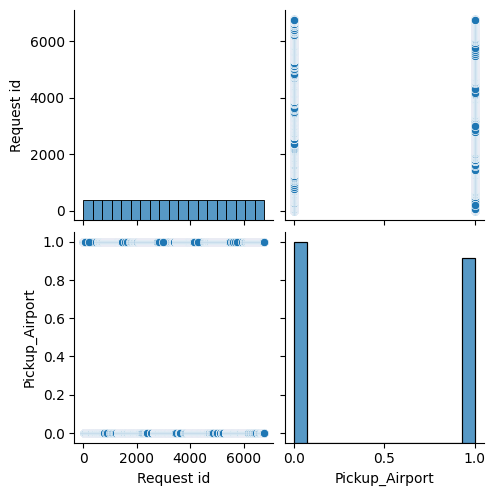

In [ ]:
sns.pairplot(data)
plt.show()

###HEATMAP

A heatmap uses color intensities to represent the strength of relationships correlation between numeric variables in a dataset.


In [ ]:
num_col=data.select_dtypes(include =['int64','float64'])

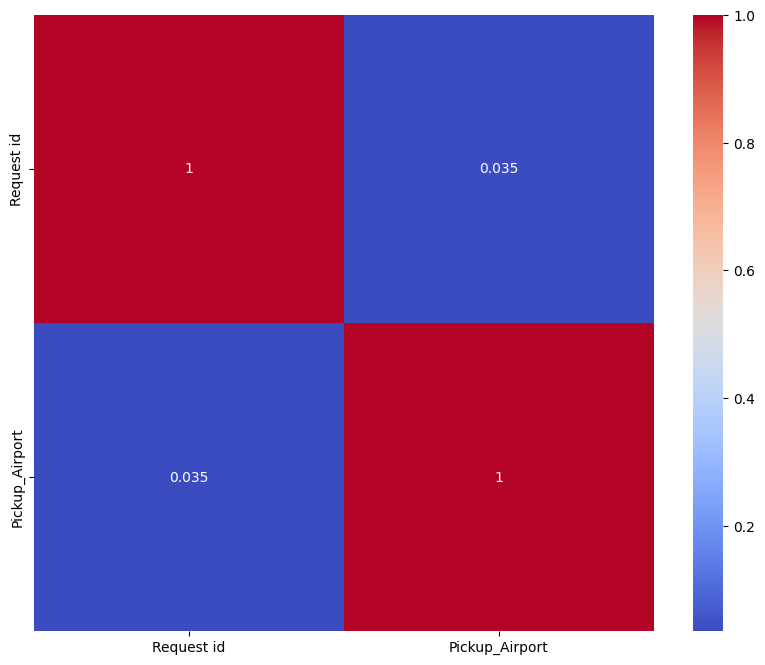

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm')
plt.show()

##Conclusion

This Exploratory Data Analysis (EDA) provides a comprehensive view of Uber's ride request patterns, uncovering critical insights into supply-demand mismatches, peak usage times, and operational inefficiencies.

Supply-Demand Mismatch:
More rides were not completed than completed, highlighting a significant imbalance between rider demand and driver availability. The high frequency of unfulfilled rides—especially due to the "No Cars Available" status—underscores the urgent need to improve driver allocation strategies, particularly during high-demand periods.

Driver Assignment Trends:
While the system successfully assigns drivers in most cases, approximately 40% of requests receive no driver, especially in high-demand zones like airports. This presents a clear opportunity for Uber to implement smarter scheduling, dynamic driver dispatching, and incentives for underserved areas.

Temporal Patterns in Demand:
Request volumes peak during the morning commute hours (37.32%), followed by evening travel times (28.07%), suggesting a two-peak daily cycle. The afternoon period sees the least activity, representing a potential window for driver rest or maintenance.

Day-Wise Request Patterns:
Requests remain relatively stable across the weekdays, with Wednesday standing out (39.20%) as the highest-demand day. This indicates the need for mid-week operational scaling, such as increased driver availability and better demand forecasting.

Pickup Point Impact:
Both city and airport pickup points show significant demand. However, "No Cars Available" incidents are notably higher at the airport, revealing a supply gap in that area. Meanwhile, completed and cancelled trips are more evenly distributed, suggesting cancellations may be due to factors beyond location—like time pressure or service delays.

Service Status Insights:
Trips marked as "Completed" and "Cancelled" always had a driver assigned, while "No Cars Available" status had none—clearly indicating that driver availability is the determining factor for whether a trip proceeds or fails.

In conclusion, this analysis highlights urgent areas for operational improvements such as targeted driver allocation, peak-time incentives, and zone-based supply planning. These insights can guide Uber’s logistics, strategy, and data science teams to make informed, data-driven decisions to reduce service gaps and enhance rider satisfaction. This foundational analysis can also be expanded into predictive demand modeling or real-time driver routing for even greater efficiency.